In [613]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from scipy import stats
from sklearn.decomposition import PCA

sns.set()
sns.set(color_codes=True)
#sns.set_color_codes()

pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.3f}'.format

In [614]:
# 1- read processed file
file_dir = '../data/processed-data/'
data_file = 'no_missing_outliers_dataset.csv'

raw_data = pd.read_csv(file_dir + data_file)
raw_data.shape

(1584, 15)

# Examine the data

In [615]:
raw_data.describe(include="all")

,svc_cpu_use,svc_cpu_thr,svc_net_use,svc_disk_use,system_cpu_use,system_cpu_sat,system_net_use,system_net_sat,system_disk_sat,system_disk_io,svc_req_size,svc_resp_size,svc_pods,svc_req_rate,ltcy
count,"1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000"
mean,1.663,0.453,0.739,0.058,7.700,3.891,14.493,0.000,0.980,0.065,0.023,0.158,13.646,19.221,0.639
std,0.704,0.334,0.378,0.039,2.041,1.562,5.392,0.000,0.000,0.389,0.012,0.113,4.475,9.134,0.300
min,0.110,0.000,0.036,0.000,1.940,0.836,2.864,0.000,0.980,0.000,0.000,0.001,2.000,0.200,0.110
25%,1.140,0.190,0.434,0.027,6.737,2.535,10.329,0.000,0.980,0.010,0.014,0.038,10.000,11.775,0.420
50%,1.660,0.400,0.707,0.050,8.330,4.174,15.167,0.000,0.980,0.010,0.023,0.163,14.000,20.470,0.630
75%,2.170,0.630,1.034,0.080,9.320,5.135,18.156,0.000,0.980,0.020,0.031,0.254,18.000,25.980,0.860
max,3.320,1.550,1.663,0.193,9.920,7.185,24.698,0.000,0.980,7.130,0.055,0.382,21.000,35.110,1.480


# Check Regression Assumptions

## 1- Normality

Examining the Normal Probability Distribution for the rest of the variables

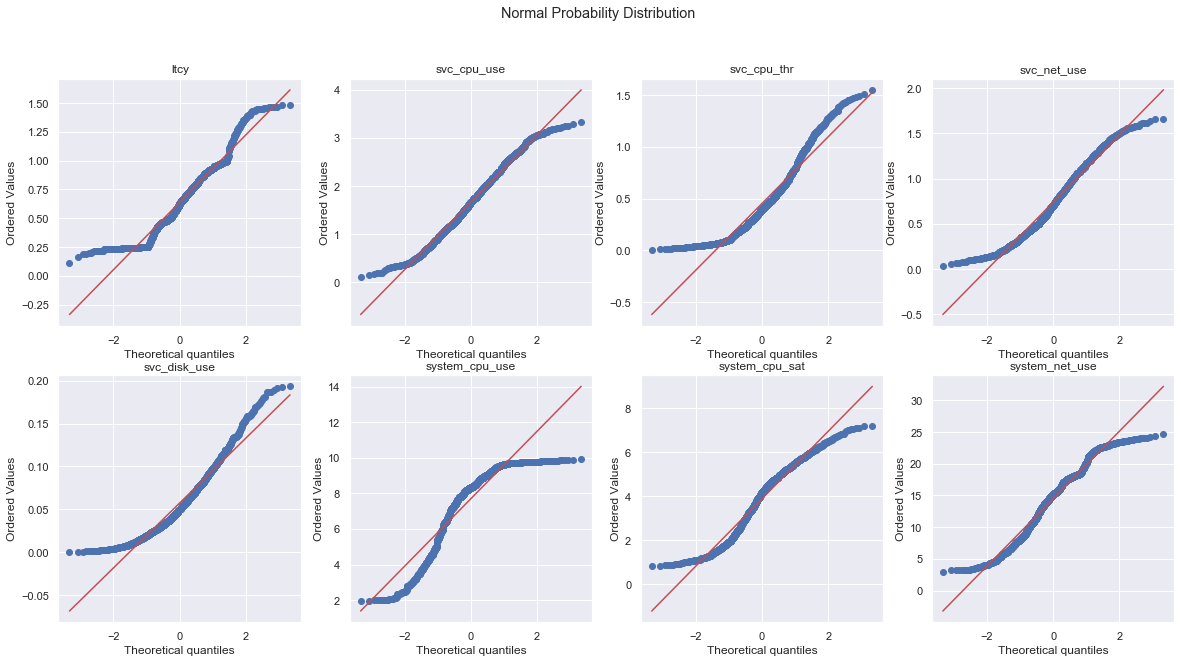

In [616]:
fig, ax = plt.subplots(2,4,figsize=(20,10))

# log_ltcy should look ok as its transformed above
stats.probplot(raw_data['ltcy'], plot=ax[0,0])
ax[0, 0].set_title('ltcy')

stats.probplot(raw_data['svc_cpu_use'], plot=ax[0,1])
ax[0, 1].set_title('svc_cpu_use')

stats.probplot(raw_data['svc_cpu_thr'], plot=ax[0,2])
ax[0, 2].set_title('svc_cpu_thr')

stats.probplot(raw_data['svc_net_use'], plot=ax[0,3])
ax[0, 3].set_title('svc_net_use')

stats.probplot(raw_data['svc_disk_use'], plot=ax[1,0])
ax[1, 0].set_title('svc_disk_use')

stats.probplot(raw_data['system_cpu_use'], plot=ax[1,1])
ax[1, 1].set_title('system_cpu_use')

stats.probplot(raw_data['system_cpu_sat'], plot=ax[1,2])
ax[1, 2].set_title('system_cpu_sat')

stats.probplot(raw_data['system_net_use'], plot=ax[1,3])
ax[1, 3].set_title('system_net_use')



fig.suptitle('Normal Probability Distribution')
plt.show()

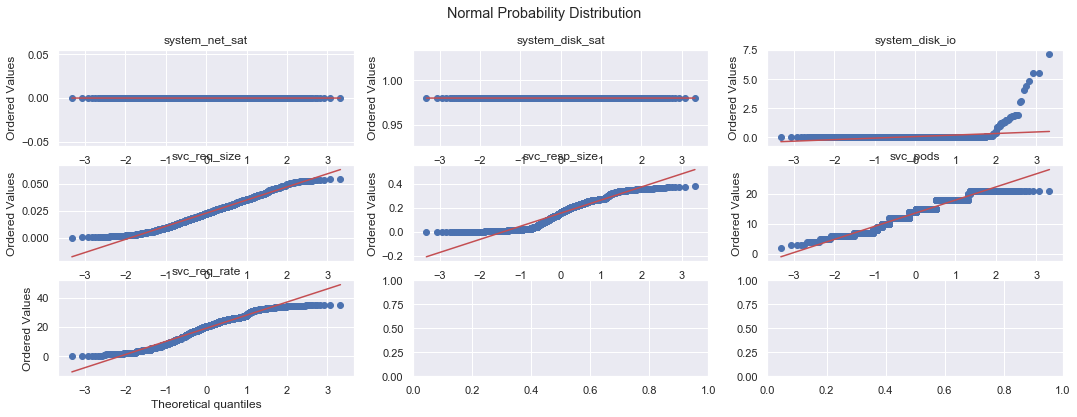

In [617]:
fig, ax = plt.subplots(3,3,figsize=(18,6))

stats.probplot(raw_data['system_net_sat'], plot=ax[0,0])
ax[0, 0].set_title('system_net_sat')

stats.probplot(raw_data['system_disk_sat'], plot=ax[0,1])
ax[0, 1].set_title('system_disk_sat')

stats.probplot(raw_data['system_disk_io'], plot=ax[0,2])
ax[0, 2].set_title('system_disk_io')

stats.probplot(raw_data['svc_req_size'], plot=ax[1,0])
ax[1, 0].set_title('svc_req_size')

stats.probplot(raw_data['svc_resp_size'], plot=ax[1,1])
ax[1, 1].set_title('svc_resp_size')

stats.probplot(raw_data['svc_pods'], plot=ax[1,2])
ax[1, 2].set_title('svc_pods')

stats.probplot(raw_data['svc_req_rate'], plot=ax[2,0])
ax[2, 0].set_title('svc_req_rate')

fig.suptitle('Normal Probability Distribution')
plt.show()

above Normal Probability Plots (MPP) illustrates so low variance for "system_net_sat", "system_disk_sat" and "system_disk_io" variables. Apparently, the system network and disk saturation are not affected when applying different loads to the application. We will drop these varibles and not consider them.

In [618]:
raw_data = raw_data.drop('system_net_sat', 1)
raw_data = raw_data.drop('system_disk_sat', 1)
raw_data = raw_data.drop('system_disk_io', 1)

###### Normalization Remedy Transformation

In [619]:
# create a new dataframe
normalized_data = pd.DataFrame()

Text(0.5, 1.0, 'ltcy NPP')

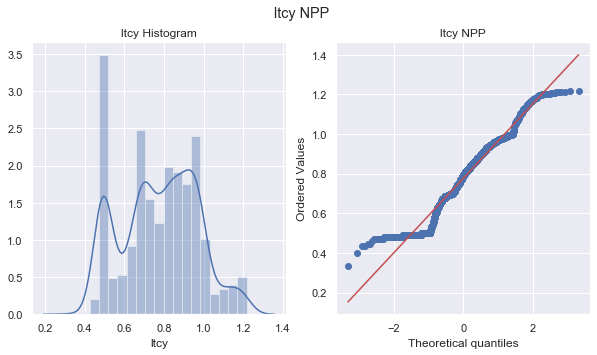

In [620]:
# svc_ltcy 
normalized_data['ltcy'] = np.sqrt(raw_data.ltcy)

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('ltcy NPP')

sns.distplot(normalized_data['ltcy'], ax=ax[0])
ax[0].set_title('ltcy Histogram')
stats.probplot(normalized_data['ltcy'], plot=ax[1])
ax[1].set_title('ltcy NPP')

Text(0.5, 1.0, 'svc_cpu_use NPP')

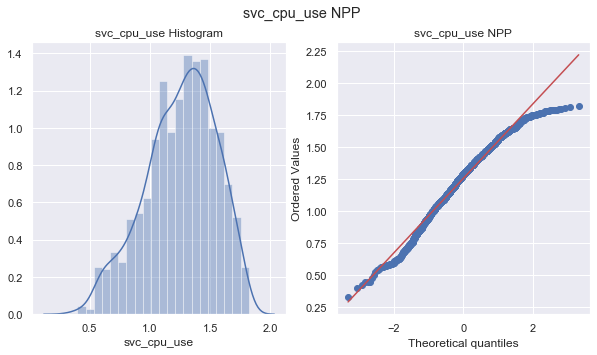

In [621]:
# svc_cpu_use: looks ok
normalized_data['svc_cpu_use'] = np.sqrt(raw_data.svc_cpu_use)

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('svc_cpu_use NPP')

sns.distplot(normalized_data['svc_cpu_use'], ax=ax[0])
ax[0].set_title('svc_cpu_use Histogram')
stats.probplot(normalized_data['svc_cpu_use'], plot=ax[1])
ax[1].set_title('svc_cpu_use NPP')

Text(0.5, 1.0, 'svc_cpu_thr NPP')

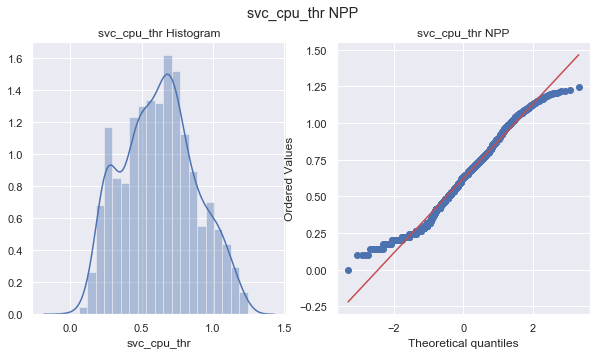

In [622]:
# svc_cpu_use: 
normalized_data['svc_cpu_thr'] = np.sqrt(raw_data.svc_cpu_thr)

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('svc_cpu_thr NPP')

sns.distplot(normalized_data['svc_cpu_thr'], ax=ax[0])
ax[0].set_title('svc_cpu_thr Histogram')
stats.probplot(normalized_data['svc_cpu_thr'], plot=ax[1])
ax[1].set_title('svc_cpu_thr NPP')

Text(0.5, 1.0, 'svc_net_use NPP')

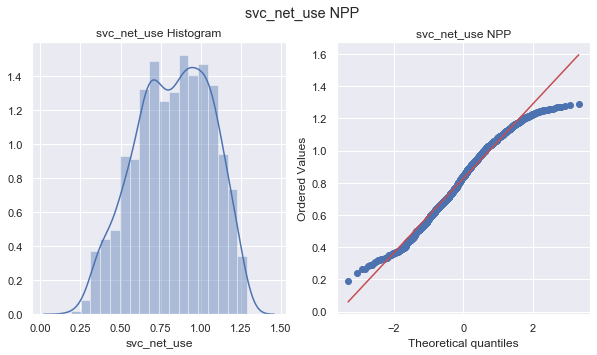

In [623]:
# svc_net_use: 
normalized_data['svc_net_use'] = np.sqrt(raw_data.svc_net_use)

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('svc_net_use NPP')

sns.distplot(normalized_data['svc_net_use'], ax=ax[0])
ax[0].set_title('svc_net_use Histogram')
stats.probplot(normalized_data['svc_net_use'], plot=ax[1])
ax[1].set_title('svc_net_use NPP')


Text(0.5, 1.0, 'svc_disk_use NPP')

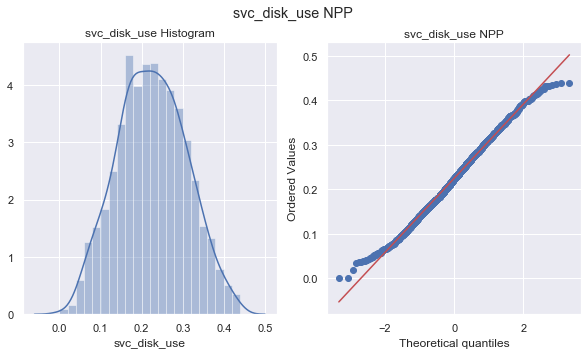

In [624]:
# svc_disk_use: 
normalized_data['svc_disk_use'] = np.sqrt(raw_data.svc_disk_use)

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('svc_disk_use NPP')

sns.distplot(normalized_data['svc_disk_use'], ax=ax[0])
ax[0].set_title('svc_disk_use Histogram')
stats.probplot(normalized_data['svc_disk_use'], plot=ax[1])
ax[1].set_title('svc_disk_use NPP')

Text(0.5, 1.0, 'system_cpu_use NPP')

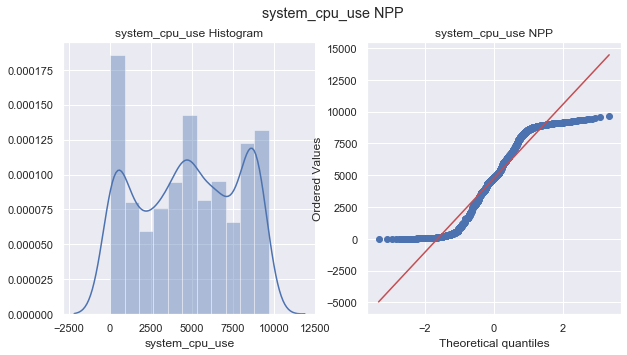

In [625]:
# system_cpu_use: looks ok, does not need a transformation
normalized_data['system_cpu_use'] = np.power(raw_data.system_cpu_use, 4)

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('system_cpu_use NPP')

sns.distplot(normalized_data['system_cpu_use'], ax=ax[0])
ax[0].set_title('system_cpu_use Histogram')
stats.probplot(normalized_data['system_cpu_use'], plot=ax[1])
ax[1].set_title('system_cpu_use NPP')

Text(0.5, 1.0, 'system_cpu_sat NPP')

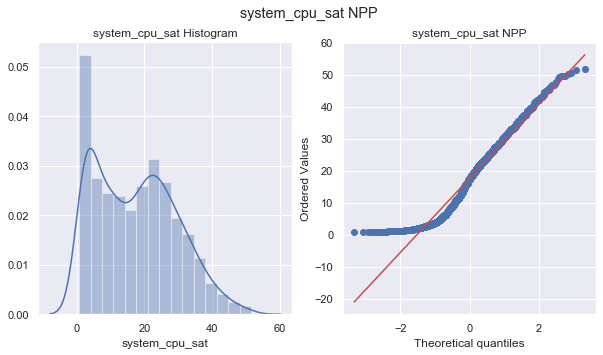

In [626]:
# svc_disk_sat: 
normalized_data['system_cpu_sat'] = np.power(raw_data.system_cpu_sat, 2)  ## for run2
#normalized_data['system_cpu_sat'] = np.sqrt(raw_data.system_cpu_sat)
#normalized_data['system_cpu_sat'] = np.power(normalized_data.system_cpu_sat, 2)

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('system_cpu_sat NPP')

sns.distplot(normalized_data['system_cpu_sat'], ax=ax[0])
ax[0].set_title('system_cpu_sat Histogram')
stats.probplot(normalized_data['system_cpu_sat'], plot=ax[1])
ax[1].set_title('system_cpu_sat NPP')

Text(0.5, 1.0, 'system_net_use NPP')

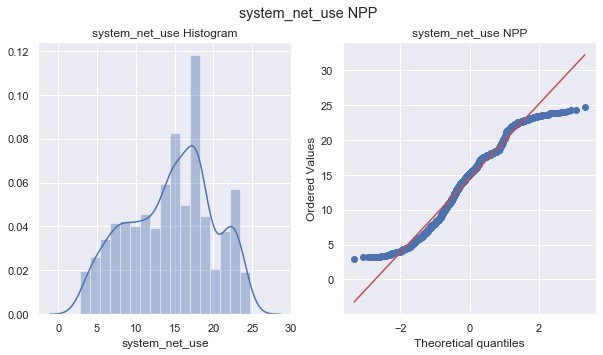

In [627]:
# system_net_use: 
normalized_data['system_net_use'] = raw_data.system_net_use

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('system_net_use NPP')

sns.distplot(normalized_data['system_net_use'], ax=ax[0])
ax[0].set_title('system_net_use Histogram')
stats.probplot(normalized_data['system_net_use'], plot=ax[1])
ax[1].set_title('system_net_use NPP')

Text(0.5, 1.0, 'svc_req_size NPP')

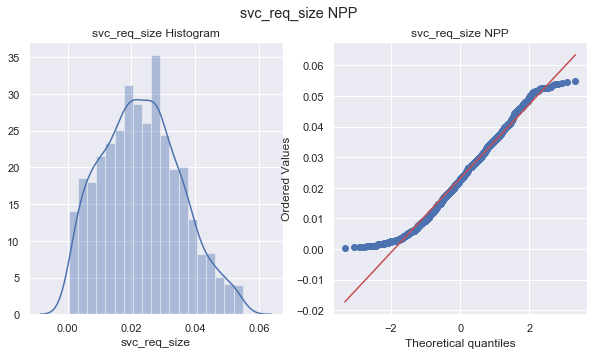

In [628]:
# svc_req_size: look ok
normalized_data['svc_req_size'] = raw_data.svc_req_size

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('svc_req_size NPP')

sns.distplot(normalized_data['svc_req_size'], ax=ax[0])
ax[0].set_title('svc_req_size Histogram')
stats.probplot(normalized_data['svc_req_size'], plot=ax[1])
ax[1].set_title('svc_req_size NPP')

Text(0.5, 1.0, 'svc_resp_size NPP')

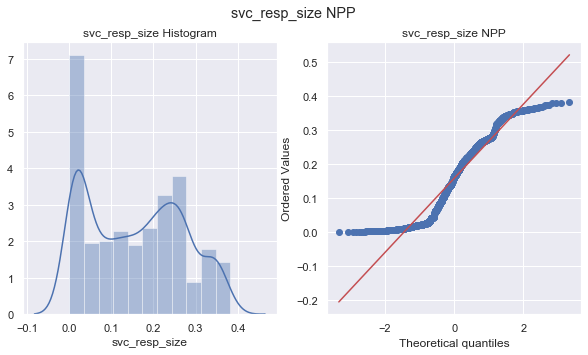

In [629]:
# svc_resp_size: 
normalized_data['svc_resp_size'] = raw_data.svc_resp_size

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('svc_resp_size NPP')

sns.distplot(normalized_data['svc_resp_size'], ax=ax[0])
ax[0].set_title('svc_resp_size Histogram')
stats.probplot(normalized_data['svc_resp_size'], plot=ax[1])
ax[1].set_title('svc_resp_size NPP')

Text(0.5, 1.0, 'svc_pods NPP')

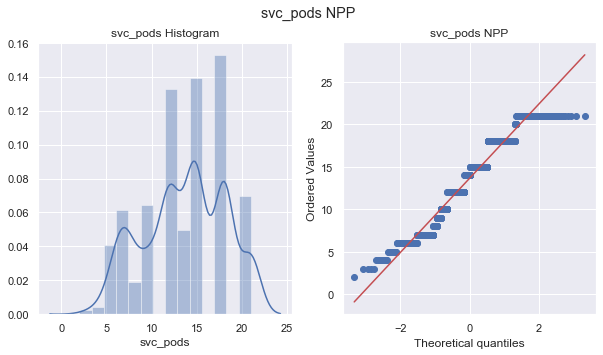

In [630]:
# svc_pods: 
normalized_data['svc_pods'] = raw_data.svc_pods

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('svc_pods NPP')

sns.distplot(normalized_data['svc_pods'], ax=ax[0])
ax[0].set_title('svc_pods Histogram')
stats.probplot(normalized_data['svc_pods'], plot=ax[1])
ax[1].set_title('svc_pods NPP')

Text(0.5, 1.0, 'svc_req_rate NPP')

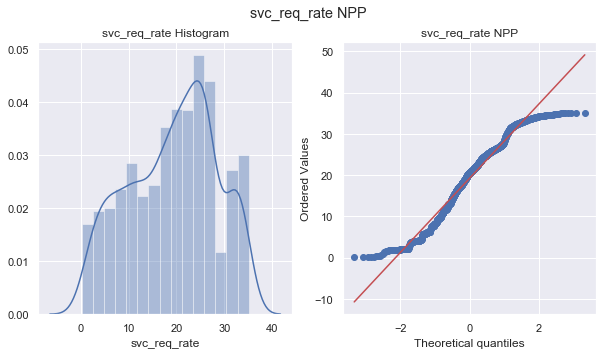

In [631]:
# svc_pods: 
normalized_data['svc_req_rate'] = raw_data.svc_req_rate

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('svc_req_rate NPP')

sns.distplot(normalized_data['svc_req_rate'], ax=ax[0])
ax[0].set_title('svc_req_rate Histogram')
stats.probplot(normalized_data['svc_req_rate'], plot=ax[1])
ax[1].set_title('svc_req_rate NPP')

In [632]:
normalized_data.describe()

,ltcy,svc_cpu_use,svc_cpu_thr,svc_net_use,svc_disk_use,system_cpu_use,system_cpu_sat,system_net_use,svc_req_size,svc_resp_size,svc_pods,svc_req_rate
count,"1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000"
mean,0.777,1.256,0.623,0.828,0.225,"4,759.075",17.579,14.493,0.023,0.158,13.646,19.221
std,0.191,0.292,0.255,0.232,0.083,"3,018.836",11.862,5.392,0.012,0.113,4.475,9.134
min,0.332,0.332,0.000,0.190,0.000,14.165,0.699,2.864,0.000,0.001,2.000,0.200
25%,0.648,1.068,0.436,0.659,0.165,"2,060.612",6.428,10.329,0.014,0.038,10.000,11.775
50%,0.794,1.288,0.632,0.841,0.224,"4,814.819",17.424,15.167,0.023,0.163,14.000,20.470
75%,0.927,1.473,0.794,1.017,0.283,"7,545.077",26.365,18.156,0.031,0.254,18.000,25.980
max,1.217,1.822,1.245,1.290,0.440,"9,683.820",51.619,24.698,0.055,0.382,21.000,35.110


###### ------------------ --------------------------- ------------------------ --------------------------

In [633]:
# Check if any null after normalization remedy
# percent of missing value for every feature
normalized_data.isnull().sum() * 100 / normalized_data.shape[0]

ltcy             0.000
svc_cpu_use      0.000
svc_cpu_thr      0.000
svc_net_use      0.000
svc_disk_use     0.000
system_cpu_use   0.000
system_cpu_sat   0.000
system_net_use   0.000
svc_req_size     0.000
svc_resp_size    0.000
svc_pods         0.000
svc_req_rate     0.000
dtype: float64

In [634]:
normalized_data.describe()

,ltcy,svc_cpu_use,svc_cpu_thr,svc_net_use,svc_disk_use,system_cpu_use,system_cpu_sat,system_net_use,svc_req_size,svc_resp_size,svc_pods,svc_req_rate
count,"1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000","1,584.000"
mean,0.777,1.256,0.623,0.828,0.225,"4,759.075",17.579,14.493,0.023,0.158,13.646,19.221
std,0.191,0.292,0.255,0.232,0.083,"3,018.836",11.862,5.392,0.012,0.113,4.475,9.134
min,0.332,0.332,0.000,0.190,0.000,14.165,0.699,2.864,0.000,0.001,2.000,0.200
25%,0.648,1.068,0.436,0.659,0.165,"2,060.612",6.428,10.329,0.014,0.038,10.000,11.775
50%,0.794,1.288,0.632,0.841,0.224,"4,814.819",17.424,15.167,0.023,0.163,14.000,20.470
75%,0.927,1.473,0.794,1.017,0.283,"7,545.077",26.365,18.156,0.031,0.254,18.000,25.980
max,1.217,1.822,1.245,1.290,0.440,"9,683.820",51.619,24.698,0.055,0.382,21.000,35.110


# Checking Regression (OLS) assumptions

## Linearity

examine features to target scatterplot

In [635]:
variables = normalized_data.columns.values
for var in variables:
    print(var)

ltcy
svc_cpu_use
svc_cpu_thr
svc_net_use
svc_disk_use
system_cpu_use
system_cpu_sat
system_net_use
svc_req_size
svc_resp_size
svc_pods
svc_req_rate


Plat every variable against the latency 

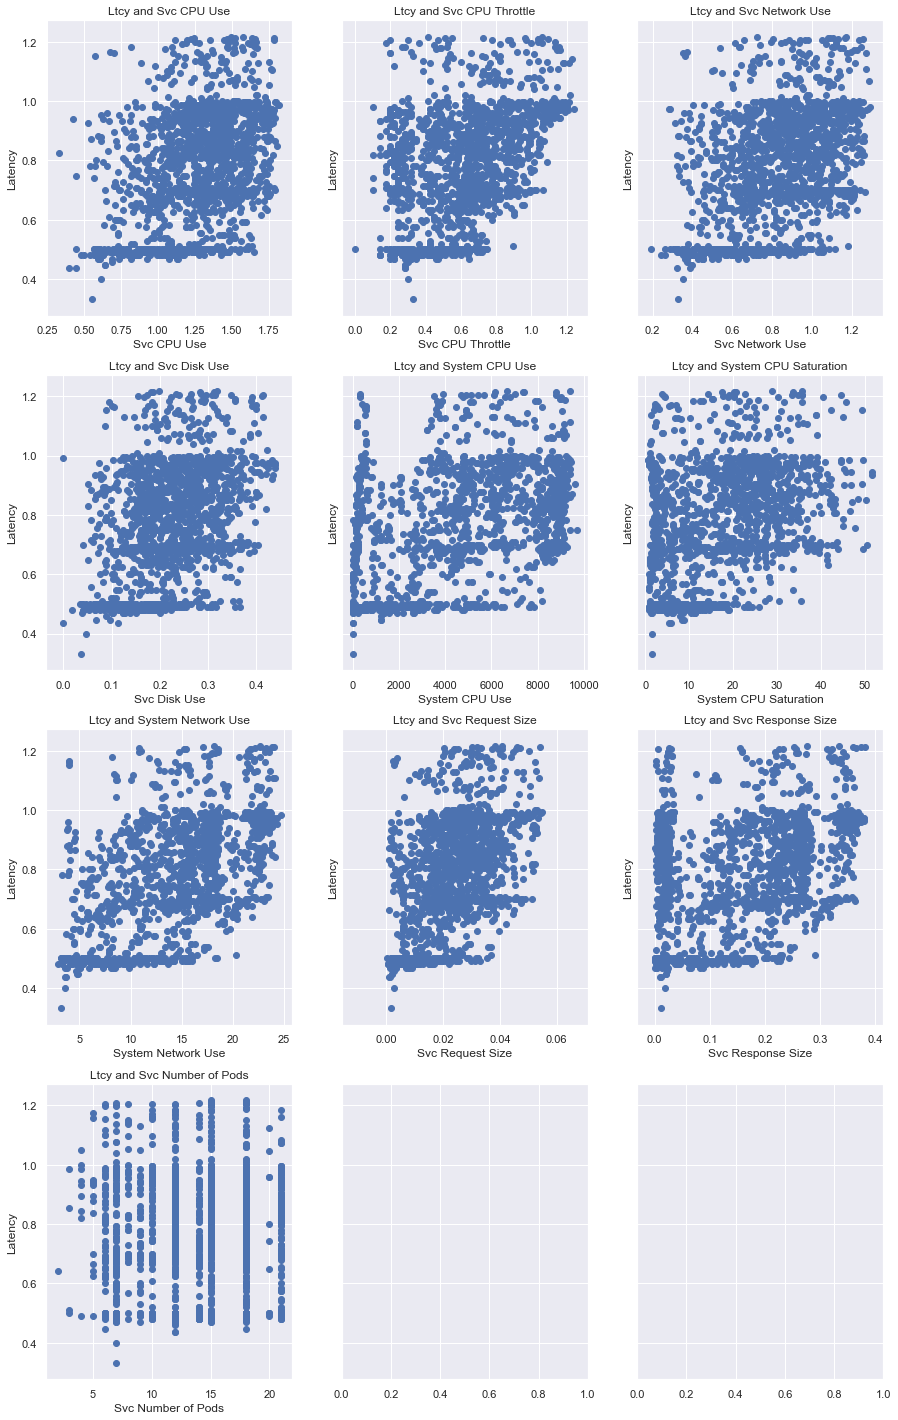

In [636]:
f, ax = plt.subplots(4, 3, sharey=True, figsize = (15,25))

ax[0,0].scatter(normalized_data['svc_cpu_use'], normalized_data['ltcy'])
ax[0,0].set_title('Ltcy and Svc CPU Use')
ax[0,0].set_xlabel('Svc CPU Use')
ax[0,0].set_ylabel('Latency')

ax[0,1].scatter(normalized_data['svc_cpu_thr'], normalized_data['ltcy'])
ax[0,1].set_title('Ltcy and Svc CPU Throttle')
ax[0,1].set_xlabel('Svc CPU Throttle')
ax[0,1].set_ylabel('Latency')

ax[0,2].scatter(normalized_data['svc_net_use'], normalized_data['ltcy'])
ax[0,2].set_title('Ltcy and Svc Network Use')
ax[0,2].set_xlabel('Svc Network Use')
ax[0,2].set_ylabel('Latency')

ax[1,0].scatter(normalized_data['svc_disk_use'], normalized_data['ltcy'])
ax[1,0].set_title('Ltcy and Svc Disk Use')
ax[1,0].set_xlabel('Svc Disk Use')
ax[1,0].set_ylabel('Latency')

ax[1,1].scatter(normalized_data['system_cpu_use'], normalized_data['ltcy'])
ax[1,1].set_title('Ltcy and System CPU Use')
ax[1,1].set_xlabel('System CPU Use')
ax[1,1].set_ylabel('Latency')

ax[1,2].scatter(normalized_data['system_cpu_sat'], normalized_data['ltcy'])
ax[1,2].set_title('Ltcy and System CPU Saturation')
ax[1,2].set_xlabel('System CPU Saturation')
ax[1,2].set_ylabel('Latency')

ax[2,0].scatter(normalized_data['system_net_use'], normalized_data['ltcy'])
ax[2,0].set_title('Ltcy and System Network Use')
ax[2,0].set_xlabel('System Network Use')
ax[2,0].set_ylabel('Latency')

ax[2,1].scatter(normalized_data['svc_req_size'], normalized_data['ltcy'])
ax[2,1].set_title('Ltcy and Svc Request Size')
ax[2,1].set_xlabel('Svc Request Size')
ax[2,1].set_ylabel('Latency')

ax[2,2].scatter(normalized_data['svc_resp_size'], normalized_data['ltcy'])
ax[2,2].set_title('Ltcy and Svc Response Size')
ax[2,2].set_xlabel('Svc Response Size')
ax[2,2].set_ylabel('Latency')

ax[3,0].scatter(normalized_data['svc_pods'], normalized_data['ltcy'])
ax[3,0].set_title('Ltcy and Svc Number of Pods')
ax[3,0].set_xlabel('Svc Number of Pods')
ax[3,0].set_ylabel('Latency')


plt.show()

# Multicollinearity

Use Variance Inflation Factor (VIF) from the statmodels. VIF measures how big is the square root of the standard error is compared to the case there is no multicollinearity between the variables. 
Conventionally:

$VIF = 1$ means no multicollinearity
$1< VIF < 5$ perfectly okay
$10 < VIF$ unacceptable range (some times < 6 or 8)

In [637]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = normalized_data[['svc_cpu_use'
            ,'svc_cpu_thr'
            ,'svc_net_use'
            ,'svc_disk_use'
            ,'system_cpu_use'
            ,'system_cpu_sat'
            ,'system_net_use'
            ,'svc_req_size'
            ,'svc_resp_size'
            ,'svc_pods']]
vif = pd.DataFrame()
vif['features'] = variables.columns
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif

,features,VIF
0,svc_cpu_use,32.969
1,svc_cpu_thr,10.759
2,svc_net_use,29.844
3,svc_disk_use,14.469
4,system_cpu_use,11.120
5,system_cpu_sat,7.730
6,system_net_use,72.605
7,svc_req_size,16.373
8,svc_resp_size,4.755
9,svc_pods,10.987


vif values are high. Consider using PCA to reduce demintionality before using any ML model. Also one can look into the features correlation matrix.

In [638]:
corr = normalized_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,ltcy,svc_cpu_use,svc_cpu_thr,svc_net_use,svc_disk_use,system_cpu_use,system_cpu_sat,system_net_use,svc_req_size,svc_resp_size,svc_pods,svc_req_rate
ltcy,1.000,0.389,0.421,0.413,0.390,0.381,0.390,0.532,0.497,0.363,0.022,0.562
svc_cpu_use,0.389,1.000,0.398,0.604,0.545,0.559,0.504,0.748,0.670,0.472,0.285,0.744
svc_cpu_thr,0.421,0.398,1.000,0.454,0.381,0.156,0.238,0.490,0.486,0.322,-0.062,0.510
svc_net_use,0.413,0.604,0.454,1.000,0.527,0.506,0.479,0.752,0.676,0.492,0.257,0.749
svc_disk_use,0.390,0.545,0.381,0.527,1.000,0.452,0.409,0.648,0.589,0.423,0.188,0.654
system_cpu_use,0.381,0.559,0.156,0.506,0.452,1.000,0.730,0.739,0.589,0.418,0.429,0.731
system_cpu_sat,0.390,0.504,0.238,0.479,0.409,0.730,1.000,0.689,0.553,0.396,0.280,0.689
system_net_use,0.532,0.748,0.490,0.752,0.648,0.739,0.689,1.000,0.848,0.616,0.352,0.985
svc_req_size,0.497,0.670,0.486,0.676,0.589,0.589,0.553,0.848,1.000,0.540,0.247,0.855
svc_resp_size,0.363,0.472,0.322,0.492,0.423,0.418,0.396,0.616,0.540,1.000,0.198,0.620


In [639]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
#plot_corr(normalized_data,20)    

The function mosthighlycorrelated() will print out the linear correlation coefficients for each pair of variables in your data set, in order of the correlation coefficient. This lets you see very easily which pair of variables are most highly correlated.

In [640]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

mcdf = mosthighlycorrelated(normalized_data, 30)
mcdf = mcdf[mcdf.Correlation > 0.5]

mcdf

,FirstVariable,SecondVariable,Correlation
0,system_net_use,svc_req_rate,0.985
1,svc_req_size,svc_req_rate,0.855
2,system_net_use,svc_req_size,0.848
3,svc_net_use,system_net_use,0.752
4,svc_net_use,svc_req_rate,0.749
...,...,...,...
25,svc_req_size,svc_resp_size,0.540
26,ltcy,system_net_use,0.532
27,svc_net_use,svc_disk_use,0.527
28,svc_cpu_thr,svc_req_rate,0.510


# Features Selection

## 1- SelectFromModel Meta-Transformer
sklearn doc: https://scikit-learn.org/stable/modules/feature_selection.html

example with regression case: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_boston.html


In [641]:
# using SelectFromModel metatransformer to select features
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

targets = normalized_data['ltcy']
inputs = normalized_data.drop(['ltcy'], axis=1)

print('shape of inputs %', inputs.shape)

scaler = StandardScaler()
scaler.fit(inputs)
standarized_inputs = scaler.transform(inputs)

print('shape of standardized inputs %', standarized_inputs.shape)

clf = LassoCV()

sfm = SelectFromModel(clf, threshold=0.05)
sfm.fit(standarized_inputs, targets)

transformed_inputs = sfm.transform(inputs)
inputs_transformed


shape of inputs % (1584, 11)
shape of standardized inputs % (1584, 11)


array([[ 3.51 ,  6.   ,  8.44 ],
       [ 4.5  ,  6.   , 13.065],
       [ 5.   ,  4.   , 17.69 ],
       ...,
       [ 9.02 , 12.   , 33.91 ],
       [ 9.04 , 15.   , 33.31 ],
       [ 9.06 , 15.   , 33.91 ]])

## 2- Component Analysis (PCA)

You can get a summary of the principal component analysis results using the pca_summary() function below, which simulates the output of R’s summary function on a PCA model:

In [642]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

# Make an instance of the Model
#pca = PCA(n_components=2, svd_solver = 'arpack', random_state=365)
pca = PCA(n_components=0.8)   # at least to explain 80% of cumulative propotion of variance
pca.fit(standarized_inputs)  

summary = pca_summary(pca, standarized_inputs)


Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.530,0.582,0.582
PC2,1.114,0.113,0.694
PC3,0.832,0.063,0.757
PC4,0.779,0.055,0.812


In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot, which we can do using the screeplot() function below. Notice the Y value of the graph (Variance) when the curve elbow shows.

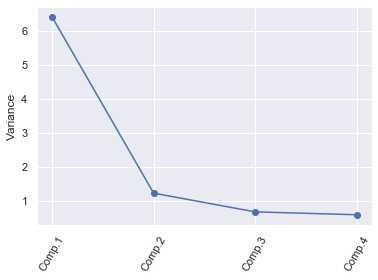

In [643]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standarized_inputs)

The most obvious change in slope in the scree plot occurs at component 3, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that at least 2 components should be retained 

Now we can find out the loadings of all features into the principal components

## PCA Loadings

In [644]:
variables = inputs.columns.values
loadings = pd.DataFrame(pca.components_, columns=variables)
loadings

,svc_cpu_use,svc_cpu_thr,svc_net_use,svc_disk_use,system_cpu_use,system_cpu_sat,system_net_use,svc_req_size,svc_resp_size,svc_pods,svc_req_rate
0,-0.317,-0.207,-0.315,-0.280,-0.305,-0.289,-0.382,-0.345,-0.263,-0.150,-0.382
1,0.029,0.585,0.119,0.143,-0.382,-0.256,-0.001,0.112,0.086,-0.624,0.040
2,-0.100,-0.129,-0.173,-0.138,0.332,0.578,0.031,-0.012,-0.206,-0.657,0.074
3,0.132,0.304,0.079,0.162,0.034,0.030,0.009,0.038,-0.904,0.192,-0.004


To calculate the values of a principal component, we can define our own function to calculate a principal component given the loadings and the input variables’ values:

In [645]:
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

# considering the first 2 factors
pc1_data = calcpc(pd.DataFrame(standarized_inputs), pca.components_[0])
pc1_data = pd.DataFrame(pc1_data, columns=['factor1'])

pc2_data = calcpc(pd.DataFrame(standarized_inputs), pca.components_[1])
pc2_data = pd.DataFrame(pc2_data,  columns=['factor2'])

pc3_data = calcpc(pd.DataFrame(standarized_inputs), pca.components_[2])
pc3_data = pd.DataFrame(pc3_data,  columns=['factor3'])

pc4_data = calcpc(pd.DataFrame(standarized_inputs), pca.components_[3])
pc4_data = pd.DataFrame(pc4_data,  columns=['factor4'])

factor_data = pd.concat([pc1_data, pc2_data, pc3_data, pc4_data, targets], axis=1, sort=False)
factor_data.head(5)

,factor1,factor2,factor3,factor4,ltcy
0,5.907,0.168,0.822,-0.491,0.332
1,5.703,0.148,0.776,-0.524,0.400
2,5.657,0.195,0.760,-0.562,0.469
3,5.464,0.406,0.815,-0.469,0.490
4,5.461,0.907,1.210,-0.537,0.500


# Save the Preprocessed Dataset to a file

In [646]:
if 1 == 1:
    normalized_data.to_csv(path_or_buf=file_dir + 'normalized_dataset.csv', index=False)
    factor_data.to_csv(path_or_buf=file_dir + 'factored_dataset.csv', index=False)

# Scale the features and save to a file

In [652]:
from sklearn.preprocessing import StandardScaler

targets = normalized_data['ltcy']
inputs = normalized_data.drop(['ltcy'], axis=1)

variables = inputs.columns.values

print('shape of inputs %', inputs.shape)

scaler = StandardScaler()
scaler.fit(inputs)
standarized_inputs = scaler.transform(inputs)
standarized_inputs = pd.DataFrame(standarized_inputs, columns=variables)

scaled_data = pd.concat([standarized_inputs,targets], axis=1, sort=False)

if 1 == 1:
     scaled_data.to_csv(path_or_buf=file_dir + 'standardized_normalized_dataset.csv', index=False)
    



shape of inputs % (1584, 11)
